$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Drawing the Penrose tiling with substitutions

The aim of this tutorial is to draw the Penrose tiling by applying a
substitution process.

## Description

We use two substitution/subdivision rules on two isosceles triangles as
in the picture, with ratios $BA/PA=BA/BQ=\frac{1+\sqrt{5}}{2}$ :

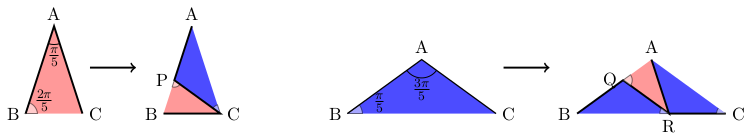

The Penrose tiling is obtained by iterating this substitution from the
red triangle. Be careful about the orientation of the triangles!

(note that the image is hosted on my machine, you should download the
image from the server if you want to have it back at home)

## Data structure

A point is a complex number. We decide to work with numerical complex
numbers, they belong to `CDF`.

A colored triangle is a quadruple `(color, A,B,C)`, where `color` is one
of the strings `'red'`, `'blue'` and `A`, `B`, `C` are points.

A tiling is a list of colored triangles.

## Writing code

Define the `golden_ratio` as a numerical approximation of
$\frac{1+\sqrt{5}}{2}$ :

In [ ]:
golden_ratio = CDF((1+sqrt(5))/2)

Define the red and blue base triangles (such that `AB=1`):

In [ ]:
def base_triangle(color):
    """
    The two bases triangles.
    """
    if color == 'red':
        C = CDF(0)
        A = CDF(exp(2*pi/5*I))
        B = CDF((C-A) * exp(pi/5*I) + A)
    elif color == 'blue':
        C = CDF(0)
        A = CDF(exp(pi/5*I))
        B = CDF((C-A) * exp(3*pi/5*I) + A)
    else:
        raise ValueError("the color must be either 'red' or 'blue'")
    return (color, A, B, C)

Write a function `plot_triangle` that plots a given colored triangle:

In [ ]:
def plot_triangle(triangle):
    """
    Plot the colored triangle.
    """
    P = Graphics()
    color = triangle[0]
    points = triangle[1:]
    P += polygon(points, color=color)
    return P

Write a function `subdivide` that subdivides a triangle according to the
rules given in the description:

In [ ]:
def subdivide(triangle):
    """
    Return the tiling that is obtained from that triangle.
    """
    color, A, B, C = triangle
    if color == 'red':
        # Subdivide red triangle
        P = A + (B - A) / golden_ratio
        return [('red', C, P, B), ('blue', P, C, A)]
    else:
        # Subdivide blue triangle
        Q = B + (A - B) / golden_ratio
        R = B + (C - B) / golden_ratio
        return [('blue', R, C, A), ('blue', Q, R, B), ('red', R, Q, A)]

Write a function `iteration` that, given a tiling and an integer `n`,
returns the tiling obtained by iterating the substitution `n` times:

In [ ]:
def iteration(tiling, n):
    r"""
    Applies n-iteration of the subdivision of Penrose tiling on
    tiling.
    """
    for _ in range(n):
        new_tiling = []
        for triangle in tiling:
            new_tiling.extend(subdivide(triangle))
        tiling = new_tiling
    return tiling

Write a function `plot_tiling` that plots a given tiling:

In [ ]:
def plot_tiling(tiling):
    G = Graphics()
    for triangle in tiling:
        G += plot_triangle(triangle)
    G.set_aspect_ratio(1)
    G.axes(False)
    return G

Draw a big patch of the Penrose tiling (about 8 or 9 iterations of a
triangle):

In [ ]:
P = plot_tiling(iteration([base_triangle('blue')], 8))
P

To see the picture in more details, save the image into the `.svg`
vectorial format and edit it with `inkscape`.

In [ ]:
P.save('/tmp/penrose_9.svg')

You can also adapt the code so that the choice of colors can be decided
during the plotting (with a `colors` option for the `plot_triangle` and
`plot_tiling` functions). For this, you can set the abstract color to be
the integers `0` or `1`.

In [ ]:
#edit here

Note

This worksheet is inspired by [this
webpage](http://preshing.com/20110831/penrose-tiling-explained) and was
written by Thierry Monteil.